### I will be using this notebook to explore my dataset and ultimately determine which model best meets the needs of my project. 

#### call Notebook: 10_import_and_inspect:

In [10]:
%run 10-import_and_inspect.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
TEAM          1757 non-null object
CONF          1757 non-null object
G             1757 non-null int64
W             1757 non-null int64
ADJOE         1757 non-null float64
ADJDE         1757 non-null float64
BARTHAG       1757 non-null float64
EFG_O         1757 non-null float64
EFG_D         1757 non-null float64
TOR           1757 non-null float64
TORD          1757 non-null float64
ORB           1757 non-null float64
DRB           1757 non-null float64
FTR           1757 non-null float64
FTRD          1757 non-null float64
2P_O          1757 non-null float64
2P_D          1757 non-null float64
3P_O          1757 non-null float64
3P_D          1757 non-null float64
ADJ_T         1757 non-null float64
WAB           1757 non-null float64
POSTSEASON    340 non-null object
SEED          340 non-null float64
YEAR          1757 non-null int64
dtypes: float64(18), int64(3), object(3)

#### import other libraries I'll need for the Data Exploration:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### Which columns in the dataset contain numeric values:

In [13]:
numeric_df = df.select_dtypes(include=['int', 'float'])

# Print the column names contained in df
print(numeric_df.columns)

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'YEAR'],
      dtype='object')


#### Explore the values in each of these numeric columns to determine which ones are necessary for the purposes of my project:

In [35]:
print(df['G'].values)
print(df['W'].values)
print(df['ADJOE'].values)
print(df['BARTHAG'].values)
print(df['EFG_O'].values)

[40 40 40 ... 36 35 37]
[33 36 33 ... 31 27 32]
[123.3 129.1 114.4 ... 122.8 117.4 117.2]
[0.9531 0.9758 0.9375 ... 0.9488 0.9238 0.9192]
[52.6 54.8 53.9 ... 55.3 55.2 57. ]


##### From the values of only 5 columns from my dataframe, I can tell that there is the need to either standardize or normalize the values in the various numeric columns of my dataset. 

#### which columns in the dataset contain string values:

In [18]:
string_df = df.select_dtypes(include=['object'])
print(string_df.columns)

Index(['TEAM', 'CONF', 'POSTSEASON'], dtype='object')


#### Explore the values in each of these three columns to determine if they should be used for predictions:

In [25]:
print(df['TEAM'].values)
print(df['CONF'].values)
print(df['POSTSEASON'].values)

['North Carolina' 'Wisconsin' 'Michigan' ... 'Tennessee' 'Gonzaga'
 'Gonzaga']
['ACC' 'B10' 'B10' ... 'SEC' 'WCC' 'WCC']
['2ND' '2ND' '2ND' ... 'S16' 'S16' 'S16']


It could be helpful to explore the number of teams that make it to the tournament from each league (Ex. ACC, B10, SEC, etc), how highly they're ranked in the national tournament, and how their performaces vary from year to year. However, these explorations would not be necessary, for the purposes of my project. 

#### Check the distribution of the features in the dataset because most models assume that the data is normally distributed:

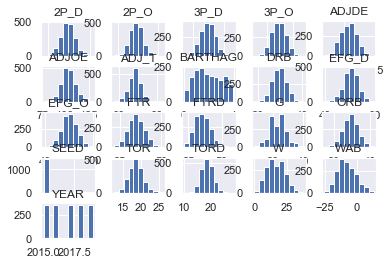

In [19]:
df.hist()
plt.show()

#### I'd like to explore the possibility of some of the features in the dataset being correlated/having a relationship:

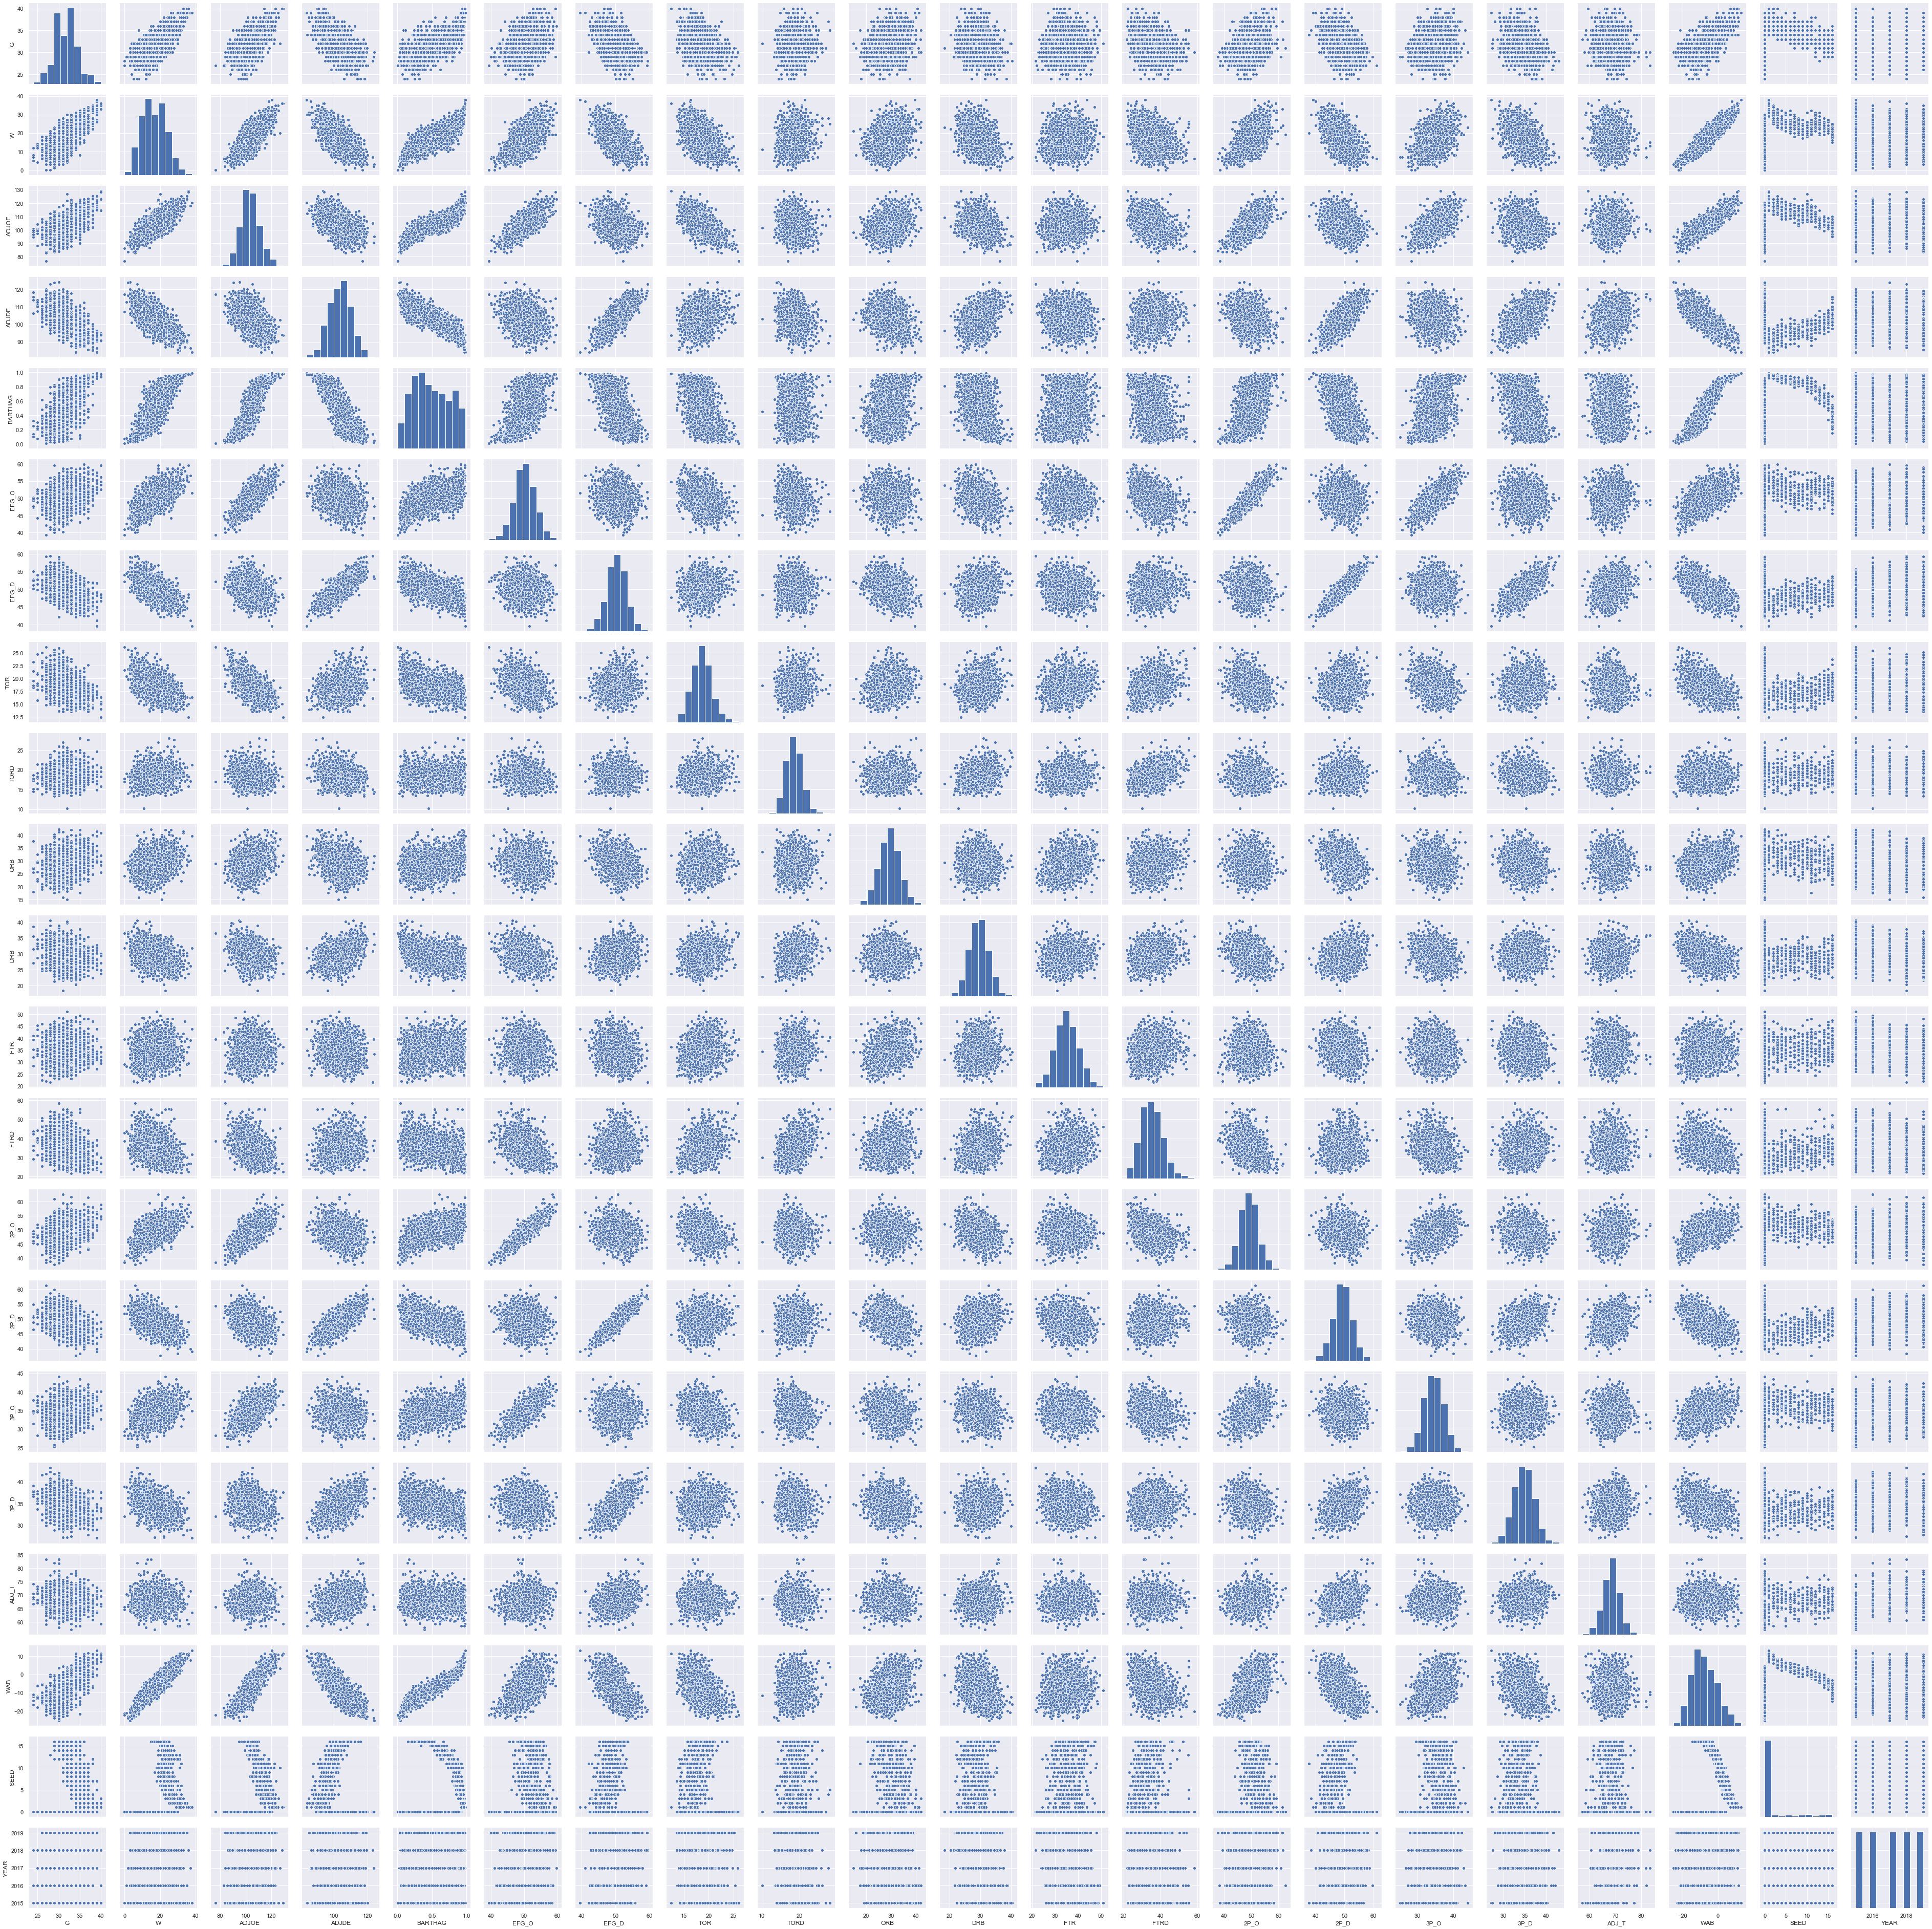

In [21]:
sns.pairplot(df)
plt.show()

#### Some of the positive correlations make a lot of sense. For example:
- BARTHAG, Power Rating & W, Number of games won. A team with a higher chance of beating an average Division I team can be expected to have a high number of wins. 

- 2P_D, Two-Point Shooting Percentage Allowed & ADJDE, Adjusted Defensive Efficiency. A team that prevents the opposing team from making baskets can be said to be efficient, defensively. 

#### Some of the positive correlations are also discoveries. For example:
- 